In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
### Helpers

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


def show_confusion_matrix(y_test, y_pred, normalize=True, figsize=(10,10)):
    cm = confusion_matrix(y_test, y_pred)

    # Normalize the confusion matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Define class labels
    labels = np.unique(y_test)

    if normalize:
        title = "Normalized Confusion Matrix"
    else:
        title = "Confusion Matrix"

    # Create plot
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=labels, yticklabels=labels,
        xlabel='Predicted label',
        ylabel='True label',
        title=title)

    # Loop over data dimensions and create text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], '.2f'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.show()

In [3]:
df = pd.read_csv("processed_data.csv", index_col=0)

In [4]:
df.head()

,business_id,stars,review_count,label,sentiment_comment,subjectivity_comment,sentiment_tip,subjectivity_tip,checkins,ByAppointmentOnly_False,...,DogsAllowed_True,BusinessAcceptsBitcoin_False,BusinessAcceptsBitcoin_Na,BusinessAcceptsBitcoin_True,Open24Hours_False,Open24Hours_Na,Open24Hours_True,AgesAllowed_False,AgesAllowed_Na,AgesAllowed_True
0,FYWN1wneV18bWNgQjJ2GNg,4.0,22,NaN,0.276481,0.562467,0.643083,0.692667,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,He-G7vWjzVUysIKrfNbPUQ,3.0,11,NaN,0.277838,0.608054,0.650000,0.662500,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,KQPW8lFf1y5BT2MxiSZ3QA,1.5,18,NaN,-0.044467,0.507554,0.000000,0.500000,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,8DShNS-LuFqpEWIp0HxijA,3.0,9,NaN,0.184669,0.458150,0.223785,0.233333,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,PfOCPjBrlQAnz__NXj9h_w,3.5,116,NaN,0.267249,0.596280,0.410907,0.555065,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [5]:
df.isna().sum()

business_id               0
stars                     0
review_count              0
label                166675
sentiment_comment         0
                      ...  
Open24Hours_Na            0
Open24Hours_True          0
AgesAllowed_False         0
AgesAllowed_Na            0
AgesAllowed_True          0
Length: 134, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174564 entries, 0 to 174563
Columns: 134 entries, business_id to AgesAllowed_True
dtypes: float64(131), int64(1), object(2)
memory usage: 179.8+ MB


In [7]:
majority_class_percentage_above_99 = []

In [8]:
for col in df.columns:
    majority_class_percentage = df[col].value_counts(normalize=True).sort_values(ascending=False).iloc[0]
    print(col, ": ", majority_class_percentage)
    if majority_class_percentage > 0.99:
        majority_class_percentage_above_99.append(col)

business_id :  5.728558007378383e-06
stars :  0.1918551362251094
review_count :  0.1856625650191334
label :  0.995309925212321
sentiment_comment :  0.00152379642996265
subjectivity_comment :  0.001002497651291217
sentiment_tip :  0.41338420292843886
subjectivity_tip :  0.36979560505029674
checkins :  0.6409969982356042
ByAppointmentOnly_False :  0.9999828143259779
ByAppointmentOnly_Na :  0.999455786989299
ByAppointmentOnly_True :  0.9994729726633211
BusinessAcceptsCreditCards_False :  0.9286794528081391
BusinessAcceptsCreditCards_Na :  0.8649148736280103
BusinessAcceptsCreditCards_True :  0.9362354208198712
BusinessParking_garage_False :  0.9911379207625857
BusinessParking_garage_Na :  0.8831832451135401
BusinessParking_garage_True :  0.8920453243509544
BusinessParking_street_False :  0.7842796911161523
BusinessParking_street_Na :  0.7745583281776312
BusinessParking_street_True :  0.9902786370614789
BusinessParking_validated_False :  0.8175110561169543
BusinessParking_validated_Na :  0

In [9]:
len(majority_class_percentage_above_99)

90

In [10]:
df.shape[1]

134

90 columns out of 134 columns have a majority class of bigger than 99%, since the categorical variables are from {categoryName}_{True/Na/False}

## Keeping only {categoryName}_True

in this analysis we decided to keep data of the {categoryName}_True predictors and assume if the data is "Na" then it is false.

In [11]:
cols = df.columns
columns = list(df.columns)
filtered_columns = [col for col in columns if col.endswith("_True")]

filtered_columns =  ["business_id",
"stars",
"review_count",
"sentiment_comment",
"subjectivity_comment",
"sentiment_tip",
"subjectivity_tip",
"checkins"] + filtered_columns

In [12]:
df = df[filtered_columns]

## Setting Threshold

<Axes: xlabel='stars', ylabel='Count'>

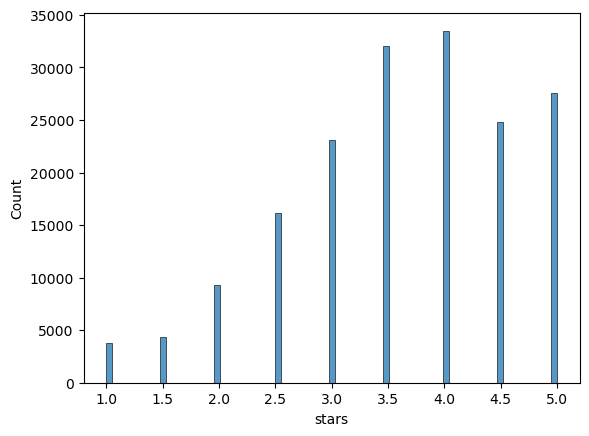

In [13]:
sns.histplot(df["stars"])

In [14]:
(df["stars"] >= 4).value_counts(normalize=True)

stars
False    0.508335
True     0.491665
Name: proportion, dtype: float64

In [15]:
(df["stars"] >= 3.5).value_counts(normalize=True)

stars
True     0.675191
False    0.324809
Name: proportion, dtype: float64

given that our main purpose of the project is to help increase star ratings for business in general a simple inference model is needed for analysis thus we chose LogisticRegression for inference

Logistic Regression works best for binary classification tasks. In our previous k-means clustering analysis with k=2, we observed that the cluster centers had star ratings above 4.2. Additionally, there is no class imbalance concern when using a threshold of 4 to classify businesses as "good." Therefore, we have selected 4 as the threshold to define businesses as "good."

In [16]:
df["fstars"] = (df["stars"] >= 4).astype(int)
y = df["fstars"].astype(str)

## Initial Modelling

In [17]:
df = df.drop(["business_id","stars"],axis=1)

In [18]:
X = df.iloc[:,1:-1]

In [19]:
y = df['fstars']

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
# Standardizing variables
scaler = StandardScaler()

X_std = scaler.fit_transform(X)

In [22]:
import statsmodels.api as sm

In [23]:
X_std = pd.DataFrame(sm.add_constant(X_std), columns = ["const"] + list(X.columns))

In [24]:
X_std

,const,sentiment_comment,subjectivity_comment,sentiment_tip,subjectivity_tip,checkins,ByAppointmentOnly_True,BusinessAcceptsCreditCards_True,BusinessParking_garage_True,BusinessParking_street_True,...,BestNights_wednesday_True,BestNights_thursday_True,BestNights_sunday_True,BestNights_saturday_True,CoatCheck_True,Smoking_True,DogsAllowed_True,BusinessAcceptsBitcoin_True,Open24Hours_True,AgesAllowed_True
0,1.0,0.513991,0.335406,1.822485,1.132076,-0.108050,-0.022963,-0.260974,2.874569,-0.09908,...,-0.010969,-0.005863,-0.007181,-0.004146,-0.037795,-0.012438,-0.116714,-0.035361,-0.018697,-0.016585
1,1.0,0.524786,0.957023,1.849022,0.967066,-0.108050,-0.022963,-0.260974,-0.347878,-0.09908,...,-0.010969,-0.005863,-0.007181,-0.004146,-0.037795,-0.012438,-0.116714,-0.035361,-0.018697,-0.016585
2,1.0,-2.039922,-0.413390,-0.644807,0.078199,-0.108050,-0.022963,-0.260974,-0.347878,-0.09908,...,-0.010969,-0.005863,-0.007181,-0.004146,-0.037795,-0.012438,-0.116714,-0.035361,-0.018697,-0.016585
3,1.0,-0.216592,-1.087068,0.213779,-1.380454,-0.108050,-0.022963,-0.260974,-0.347878,-0.09908,...,-0.010969,-0.005863,-0.007181,-0.004146,-0.037795,-0.012438,-0.116714,-0.035361,-0.018697,-0.016585
4,1.0,0.440525,0.796478,0.931703,0.379404,-0.108050,-0.022963,-0.260974,-0.347878,-0.09908,...,-0.010969,-0.005863,-0.007181,-0.004146,-0.037795,-0.012438,-0.116714,-0.035361,-0.018697,-0.016585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174559,1.0,-0.287330,-1.247613,-0.078900,-0.195298,-0.108050,-0.022963,-0.260974,-0.347878,-0.09908,...,-0.010969,-0.005863,-0.007181,-0.004146,-0.037795,-0.012438,-0.116714,-0.035361,-0.018697,-0.016585
174560,1.0,1.083332,-0.683373,-0.644807,0.078199,-0.337489,-0.022963,-0.260974,2.874569,-0.09908,...,-0.010969,-0.005863,-0.007181,-0.004146,-0.037795,-0.012438,-0.116714,-0.035361,-0.018697,-0.016585
174561,1.0,-2.087959,-0.278418,-0.644807,0.078199,-0.108050,-0.022963,3.831800,-0.347878,-0.09908,...,-0.010969,-0.005863,-0.007181,-0.004146,-0.037795,-0.012438,-0.116714,-0.035361,-0.018697,-0.016585
174562,1.0,1.185334,0.489691,2.616354,2.175013,-0.108050,-0.022963,-0.260974,-0.347878,-0.09908,...,-0.010969,-0.005863,-0.007181,-0.004146,-0.037795,-0.012438,-0.116714,-0.035361,-0.018697,-0.016585


In [25]:
logit_model = sm.Logit(y,X_std)

In [26]:
result = logit_model.fit()
print(result.summary())

         Current function value: 0.427552
         Iterations: 35


C:\Users\kbzh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                 fstars   No. Observations:               174564
Model:                          Logit   Df Residuals:                   174526
Method:                           MLE   Df Model:                           37
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.3830
Time:                        05:06:55   Log-Likelihood:                -74635.
converged:                      False   LL-Null:                   -1.2097e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.2041     22.676     -0.009      0.993     -44.648      44.240
sentiment_comment                   2.5565      0.013    195.002    

the logistic regression model fail to converge even with many iterations this may be due to many unary variables

In [27]:
X_std = pd.DataFrame(X_std, columns=["const"]+ list(X.columns))

In [28]:
X_std

,const,sentiment_comment,subjectivity_comment,sentiment_tip,subjectivity_tip,checkins,ByAppointmentOnly_True,BusinessAcceptsCreditCards_True,BusinessParking_garage_True,BusinessParking_street_True,...,BestNights_wednesday_True,BestNights_thursday_True,BestNights_sunday_True,BestNights_saturday_True,CoatCheck_True,Smoking_True,DogsAllowed_True,BusinessAcceptsBitcoin_True,Open24Hours_True,AgesAllowed_True
0,1.0,0.513991,0.335406,1.822485,1.132076,-0.108050,-0.022963,-0.260974,2.874569,-0.09908,...,-0.010969,-0.005863,-0.007181,-0.004146,-0.037795,-0.012438,-0.116714,-0.035361,-0.018697,-0.016585
1,1.0,0.524786,0.957023,1.849022,0.967066,-0.108050,-0.022963,-0.260974,-0.347878,-0.09908,...,-0.010969,-0.005863,-0.007181,-0.004146,-0.037795,-0.012438,-0.116714,-0.035361,-0.018697,-0.016585
2,1.0,-2.039922,-0.413390,-0.644807,0.078199,-0.108050,-0.022963,-0.260974,-0.347878,-0.09908,...,-0.010969,-0.005863,-0.007181,-0.004146,-0.037795,-0.012438,-0.116714,-0.035361,-0.018697,-0.016585
3,1.0,-0.216592,-1.087068,0.213779,-1.380454,-0.108050,-0.022963,-0.260974,-0.347878,-0.09908,...,-0.010969,-0.005863,-0.007181,-0.004146,-0.037795,-0.012438,-0.116714,-0.035361,-0.018697,-0.016585
4,1.0,0.440525,0.796478,0.931703,0.379404,-0.108050,-0.022963,-0.260974,-0.347878,-0.09908,...,-0.010969,-0.005863,-0.007181,-0.004146,-0.037795,-0.012438,-0.116714,-0.035361,-0.018697,-0.016585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174559,1.0,-0.287330,-1.247613,-0.078900,-0.195298,-0.108050,-0.022963,-0.260974,-0.347878,-0.09908,...,-0.010969,-0.005863,-0.007181,-0.004146,-0.037795,-0.012438,-0.116714,-0.035361,-0.018697,-0.016585
174560,1.0,1.083332,-0.683373,-0.644807,0.078199,-0.337489,-0.022963,-0.260974,2.874569,-0.09908,...,-0.010969,-0.005863,-0.007181,-0.004146,-0.037795,-0.012438,-0.116714,-0.035361,-0.018697,-0.016585
174561,1.0,-2.087959,-0.278418,-0.644807,0.078199,-0.108050,-0.022963,3.831800,-0.347878,-0.09908,...,-0.010969,-0.005863,-0.007181,-0.004146,-0.037795,-0.012438,-0.116714,-0.035361,-0.018697,-0.016585
174562,1.0,1.185334,0.489691,2.616354,2.175013,-0.108050,-0.022963,-0.260974,-0.347878,-0.09908,...,-0.010969,-0.005863,-0.007181,-0.004146,-0.037795,-0.012438,-0.116714,-0.035361,-0.018697,-0.016585


In [29]:
for col in X_std:
    # Display the highest majority class normalized percentage
    print(col, ": ", X_std[col].value_counts(normalize=True).sort_values(ascending=False).iloc[0])

const :  1.0
sentiment_comment :  0.0015295249879700283
subjectivity_comment :  0.001002497651291217
sentiment_tip :  0.4135045026465938
subjectivity_tip :  0.36979560505029674
checkins :  0.6409969982356042
ByAppointmentOnly_True :  0.9994729726633211
BusinessAcceptsCreditCards_True :  0.9362354208198712
BusinessParking_garage_True :  0.8920453243509544
BusinessParking_street_True :  0.9902786370614789
BusinessParking_validated_True :  0.9570472720606769
BusinessParking_lot_True :  0.9988829311885612
BusinessParking_valet_True :  0.9163745102082904
WheelchairAccessible_True :  0.8978197108223918
BikeParking_True :  0.8049712426388029
Alcohol_True :  0.9562853738456956
NoiseLevel_True :  0.9993927728512179
Music_background_music_True :  0.999954171535941
Music_no_music_True :  0.9999713572099631
Music_live_True :  0.9999942714419926
Music_video_True :  0.9999770857679705
Music_jukebox_True :  0.9999942714419926
Ambience_romantic_True :  0.9999656286519557
WiFi_True :  0.999656286519557

we can see that there are many variables which are majority with 99% percent of the data point being in one class

In [30]:
no_unary_variables = []

setting arbritrary threshold as 0.05 for the minority class

In [31]:
for col in X_std:
    if len(X_std[col].unique()) == 2:
        # Only keep columns which's minority class in a binary predictor is more or equal to 0.05
        if X_std[col].value_counts(normalize=True).sort_values().iloc[0] >= 0.05:
            no_unary_variables.append(col)
    else:
        # Keep any non binary predictor
        no_unary_variables.append(col)

In [32]:
X_std_2 = X_std[no_unary_variables]

In [33]:
X_std_2

,const,sentiment_comment,subjectivity_comment,sentiment_tip,subjectivity_tip,checkins,BusinessAcceptsCreditCards_True,BusinessParking_garage_True,BusinessParking_valet_True,WheelchairAccessible_True,BikeParking_True
0,1.0,0.513991,0.335406,1.822485,1.132076,-0.108050,-0.260974,2.874569,-0.302088,-0.337356,-0.492220
1,1.0,0.524786,0.957023,1.849022,0.967066,-0.108050,-0.260974,-0.347878,-0.302088,-0.337356,2.031612
2,1.0,-2.039922,-0.413390,-0.644807,0.078199,-0.108050,-0.260974,-0.347878,-0.302088,-0.337356,-0.492220
3,1.0,-0.216592,-1.087068,0.213779,-1.380454,-0.108050,-0.260974,-0.347878,-0.302088,-0.337356,-0.492220
4,1.0,0.440525,0.796478,0.931703,0.379404,-0.108050,-0.260974,-0.347878,-0.302088,-0.337356,-0.492220
...,...,...,...,...,...,...,...,...,...,...,...
174559,1.0,-0.287330,-1.247613,-0.078900,-0.195298,-0.108050,-0.260974,-0.347878,-0.302088,-0.337356,-0.492220
174560,1.0,1.083332,-0.683373,-0.644807,0.078199,-0.337489,-0.260974,2.874569,-0.302088,-0.337356,-0.492220
174561,1.0,-2.087959,-0.278418,-0.644807,0.078199,-0.108050,3.831800,-0.347878,-0.302088,-0.337356,-0.492220
174562,1.0,1.185334,0.489691,2.616354,2.175013,-0.108050,-0.260974,-0.347878,-0.302088,-0.337356,-0.492220


In [34]:
list(X_std_2.columns)

['const',
 'sentiment_comment',
 'subjectivity_comment',
 'sentiment_tip',
 'subjectivity_tip',
 'checkins',
 'BusinessAcceptsCreditCards_True',
 'BusinessParking_garage_True',
 'BusinessParking_valet_True',
 'WheelchairAccessible_True',
 'BikeParking_True']

In [35]:
logit_v2=sm.Logit(y, X_std_2)

In [36]:
result=logit_v2.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.428135
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 fstars   No. Observations:               174564
Model:                          Logit   Df Residuals:                   174553
Method:                           MLE   Df Model:                           10
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.3822
Time:                        05:06:56   Log-Likelihood:                -74737.
converged:                       True   LL-Null:                   -1.2097e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.2011      0.007    -30.366  

removing the "WheelchairAccessible_True" since it is statistically unsignificant

In [37]:
v3_cols = list(X_std_2.columns)
v3_cols.remove("WheelchairAccessible_True")

In [38]:
X_std_3 = X_std_2[v3_cols]

In [39]:
logit_v3=sm.Logit(y, X_std_3)

In [40]:
result=logit_v3.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.428142
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 fstars   No. Observations:               174564
Model:                          Logit   Df Residuals:                   174554
Method:                           MLE   Df Model:                            9
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.3822
Time:                        05:06:57   Log-Likelihood:                -74738.
converged:                       True   LL-Null:                   -1.2097e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.2014      0.007    -30.423  

Given that all of the p values of the logistic regression is below 5% then we can assume that these are statistically significant

To interpret these coefficients:

$logit(p)$ = const + 2.5612 * sentiment_comment - 0.4024 * subjectivity_comment + ...

$logit(p)$ = const + 2.5612 * sentiment_comment - 0.4024 * subjectivity_comment + ... given the threshold of 0.5 that we set

an example would be a one unit increase in standardized sentiment_comment will result in 2.5612 increase in logit(p)

logit(p): log-odds = $log(\frac{P(Y=1)}{P(Y=0)})$

This means that odds $\frac{P(Y=1)}{P(Y=0)}$ will incrase by $e^{2.5612} \approx 12.95$

In [41]:
df["sentiment_comment"].std()

0.1256696408961332

In [42]:
2.5612 / 0.1256

20.391719745222932

In [43]:
np.exp(2.5612 / 0.1256)

717813070.2127041

however if we look from the perspective of before standardized increase in the original prestandardized would result in a  logit_coeff / std in increase. So for sentiment_comment, one unit increase in the original dataset would result in a 2.5612 / 0.1256 increase in the log odds or the odds will increase by $\approx$ 717813070

In [44]:
v_final = v3_cols.copy()
v_final.remove("const")

In [45]:
df_final = df[v_final]

In [46]:
scaler_final = StandardScaler()

In [47]:
X_final_std = pd.DataFrame(scaler_final.fit_transform(df_final), columns=df_final.columns)

In [48]:
(X_final_std != X_std_3.iloc[:,1:]).sum().sum()

0

In [49]:
ones = scaler_final.transform([[1 for i in range(len(X_final_std.columns))]])
zeros = scaler_final.transform([[0 for i in range(len(X_final_std.columns))]])

C:\Users\kbzh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\kbzh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [50]:
diffs = (ones - zeros)[0]

In [51]:
log_odds_increase = []

In [52]:
for i in range(len(diffs)):
    log_odds = diffs[i] * result.params.iloc[1:].values[i]
    log_odds_increase.append(log_odds)
    print(X_final_std.columns[i],": ",log_odds)

sentiment_comment :  20.38018924134666
subjectivity_comment :  -5.487500214203079
sentiment_tip :  0.15936065671560828
subjectivity_tip :  0.10349198787280968
checkins :  -0.005912096757587526
BusinessAcceptsCreditCards_True :  0.6329159402566883
BusinessParking_garage_True :  0.4124813826122034
BusinessParking_valet_True :  -0.398905222435526
BikeParking_True :  0.08573335251613644


In [53]:
odds_increase = [np.exp(x) for x in log_odds_increase]

print("Therefore after these calculations an increase in 1 unit within the original dataset or it being True (for boolean variables) (before standardization) would result in a:")
for i in range(len(diffs)):
    print("   ",X_final_std.columns[i],": make the rating to be positive ",odds_increase[i], " more likely to occur")

Therefore after these calculations an increase in 1 unit within the original dataset or it being True (for boolean variables) (before standardization) would result in a:
    sentiment_comment : make the rating to be positive  709583858.4774177  more likely to occur
    subjectivity_comment : make the rating to be positive  0.004138175808550341  more likely to occur
    sentiment_tip : make the rating to be positive  1.1727608344882305  more likely to occur
    subjectivity_tip : make the rating to be positive  1.1090369075847086  more likely to occur
    checkins : make the rating to be positive  0.9941053452964829  more likely to occur
    BusinessAcceptsCreditCards_True : make the rating to be positive  1.883093569690037  more likely to occur
    BusinessParking_garage_True : make the rating to be positive  1.510561419338151  more likely to occur
    BusinessParking_valet_True : make the rating to be positive  0.6710542992316832  more likely to occur
    BikeParking_True : make the r

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [55]:
import numpy as np

def split_dataset_k_folds(dataset, k, random_seed=None):

    indexes = list(dataset.index)

    rs = np.random.RandomState(seed=random_seed)

    rs.shuffle(indexes)

    part_size = len(dataset) // k

    folds = [indexes[i * part_size: (i+1) * part_size] for i in range(k-1)]
    folds.append(indexes[(k-1) * part_size:])

    return folds

In [56]:
def train_sm_logit(X_train, X_test, y_train, y_test):
    import statsmodels.api as sm
    from sklearn.metrics import accuracy_score

    logreg = sm.Logit(y_train, X_train)
    result = logreg.fit()
    y_pred = (result.predict(X_test) > 0.5).astype(int)

    return (result, y_pred, y_test, accuracy_score(y_test, y_pred))

In [57]:
k = 10
random_seed = 776

In [58]:
def cross_validation_in_sm(X, y, k, random_seed=None):

    fold = split_dataset_k_folds(X, k, random_seed)

    results = {}

    for i in range(k):
        train = [j for j in range(k) if j != i]

        X_test = X.iloc[fold[i]]
        y_test = y.iloc[fold[i]]

        X_train = pd.concat([X.iloc[fold[j]] for j in train])
        y_train = pd.concat([y.iloc[fold[j]] for j in train])

        results[i] = train_sm_logit(X_train, X_test, y_train, y_test)

    return results


In [59]:
results = cross_validation_in_sm(X_std_3, y, k, random_seed)

Optimization terminated successfully.
         Current function value: 0.428263
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.427475
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.427859
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.428400
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.428585
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.428091
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.428387
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.427346
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.428695
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.428289
  

In [60]:
np.mean([results[i][-1] for i in range(k)])

0.809622789762747

After 10-fold CV we found that the model accuracy is 80.9%

In [61]:
# Grabbing the worst accuracy within the CVs
np.argmin([results[i][-1] for i in range(k)])

7

In [62]:
y_pred = results[7][1]
y_test = results[7][2]

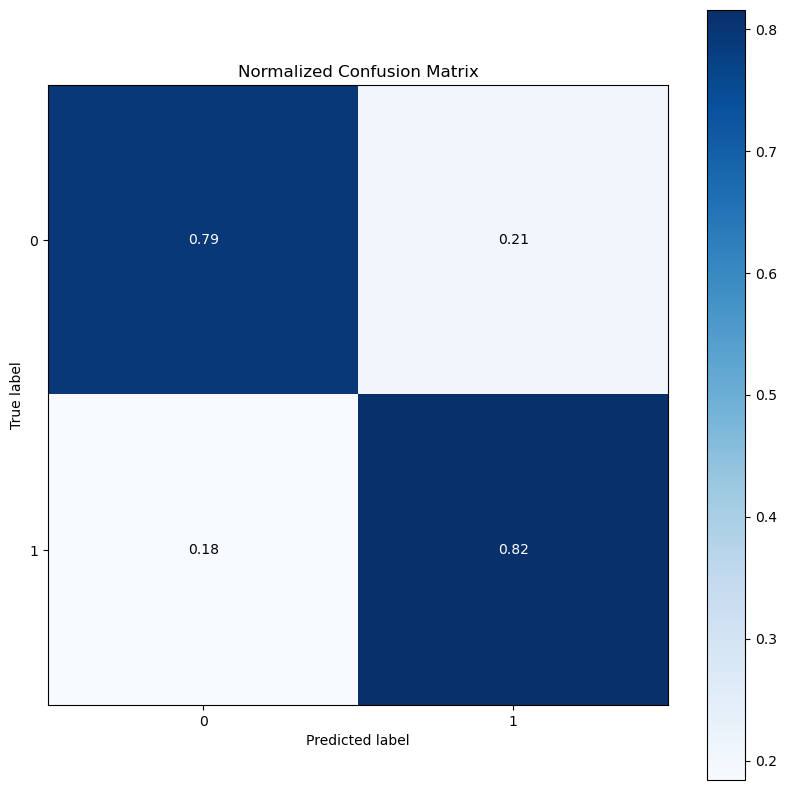

In [63]:
# Normalized confusion matrix within the worst cross validation result
show_confusion_matrix(y_test, y_pred)